# ADS Homework 2. part 1

## 1: Classification of Hand-Written Digits

Sklearn provides a dataset of handwritten digits as one of the examples. This data includes impages of 1787 digits. For each digit, we have 64 variables x1,x2,...x64, each one representing a pixel (grayscale from 0 to 16) on the 8x8 image. The label (y) for each image is the actual digit it represents from 0 to 9.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy.stats import t

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the data
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data # the digits data
y = digits.target # the labels for the digits. This label is only used for coloring the points.
#Make a dataframe
data=pd.DataFrame(np.concatenate((y.reshape(len(y),1),X),axis=1))
data.columns=["y"]+["x{}".format(i) for i in range(1,65)]
data.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64
0,0.0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,2.0,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,3.0,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,4.0,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [3]:
#original image data is a 2D array
X.shape

(1797, 64)

#### If we take the first 10 observations and reconstruct the graph and we could see:  

Label:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


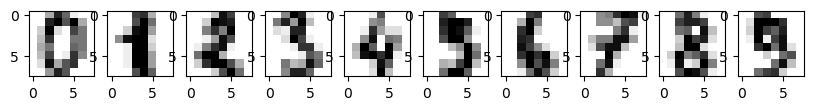

In [4]:
#plot the digits using imshow from matplotlib
plt.figure(figsize=(10,1))
print("Label:{}".format(list(y[:10])))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X[i].reshape(8,8), cmap=plt.cm.gray_r)
plt.show()

### Task 1: Apply PCA to see if we can describe the data with a smaller number of most significant features

In [5]:
#set target variable (y) as index
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn import preprocessing

datay = data
datay.set_index('y', inplace=True)
datay

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64
y,,,,,,,,,,,,,,,,,,,,,
0.0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1.0,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2.0,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3.0,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4.0,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.0,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
0.0,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
8.0,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0


In [6]:
# apply standardization to the pixels data (even though the features are grayscale pixels this way it might be useful to account for heterogenous density in different areas)
scalery = preprocessing.StandardScaler().fit(datay)
datayS=scalery.transform(datay)

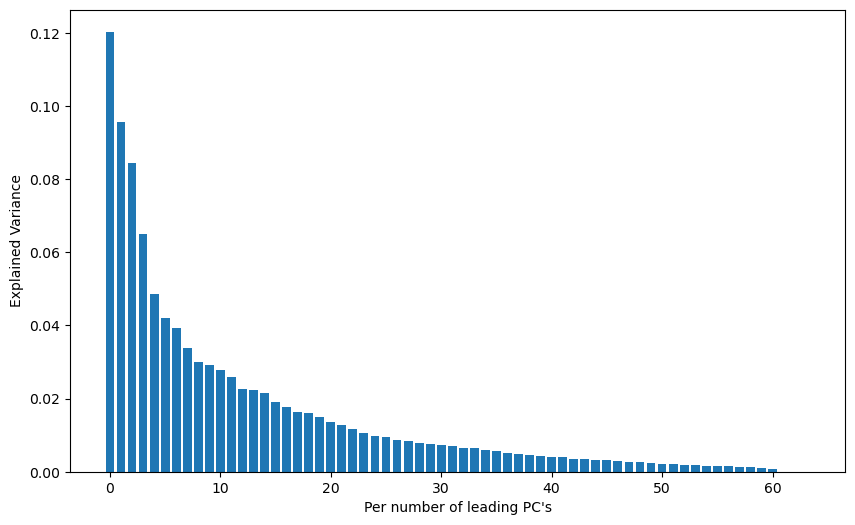

In [7]:
#perform PC decomposition over data
pca = PCA()
datayP=pca.fit_transform(datayS)
eigenvalues = pca.explained_variance_ratio_
#Plot explained variance per number of leading PC's
n = 64
plt.figure(figsize=(10, 6))
plt.bar(np.arange(n), eigenvalues)
plt.xlabel("Per number of leading PC's")
plt.ylabel("Explained Variance")
plt.show()

In [8]:
#describe in a few words what you can infer from the above plot

# The figure shows the relationship with variance and each leading PC’s. 
# Obviously, the first 4 are the main causes of the variance. The remains contribute less to the variance. 
# The slope of changes gradually becomes smooth, and the explained variance values are smaller. 

### Task 2: Now use three leading PCs to visualize the digits (a 3d scatterplot in PC space with different colors representing different digits)

In [9]:
#reapply PCA with three components so we can visualize in 3 dimensions
pca = PCA(n_components=3)
datayP=pca.fit_transform(datayS)
datayP

array([[ 1.91421182, -0.95450599, -3.94600879],
       [ 0.58898282,  0.92464165,  3.92473605],
       [ 1.30204189, -0.31716893,  3.02331702],
       ...,
       [ 1.02259231, -0.14792413,  2.46998956],
       [ 1.07605002, -0.38090601, -2.4554497 ],
       [-1.25771232, -2.22761267,  0.28368781]])

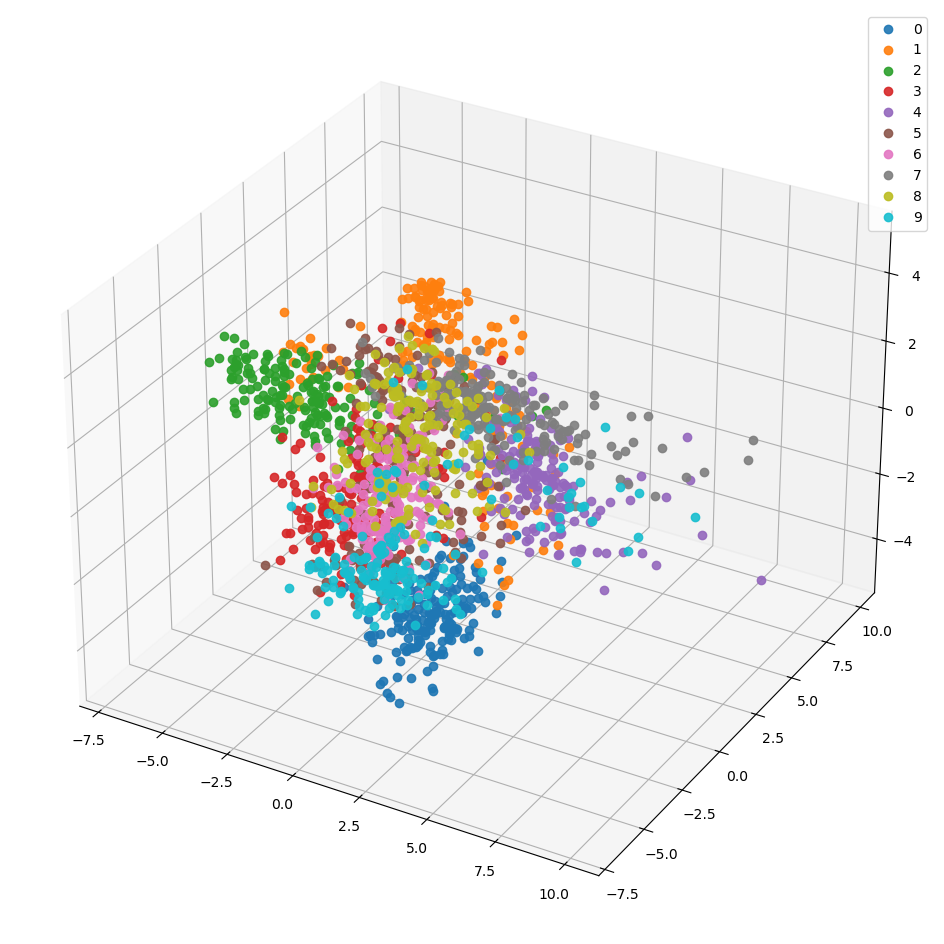

In [10]:
# use matplotlib 3D scatter plot: https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
X = load_digits()
labels = X.target

fig = plt.figure(1, figsize=(15, 12))
ax = fig.add_subplot(111, projection='3d')

for i in range(10):
    plt.plot(np.array(datayP[labels==i,0]), np.array(datayP[labels==i,1]), np.array(datayP[labels==i,2]),'o', alpha=0.9, label=i)
    
plt.legend(loc='best')
plt.show()

### Task 3: Find examples of the pairs of digits which a) can and b) can not be clearly distinguished on a 2D plot of  first two PCs (provide 3 examples each on separate plots)

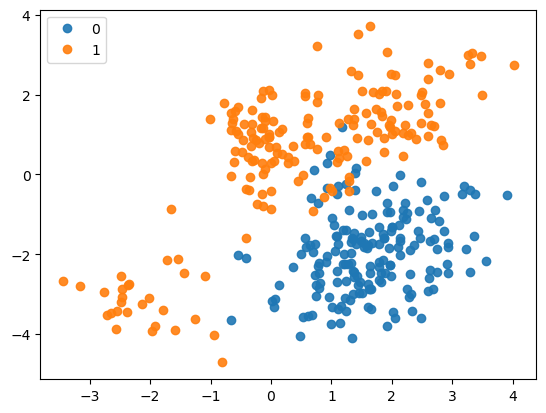

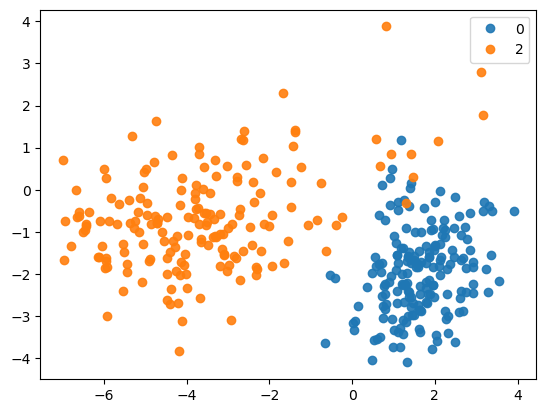

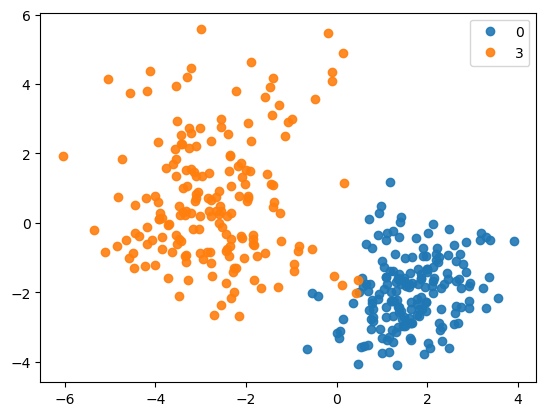

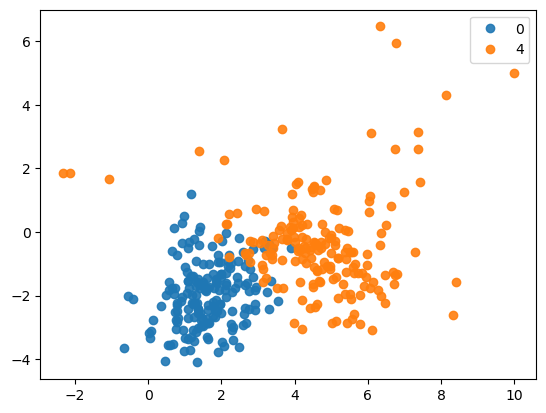

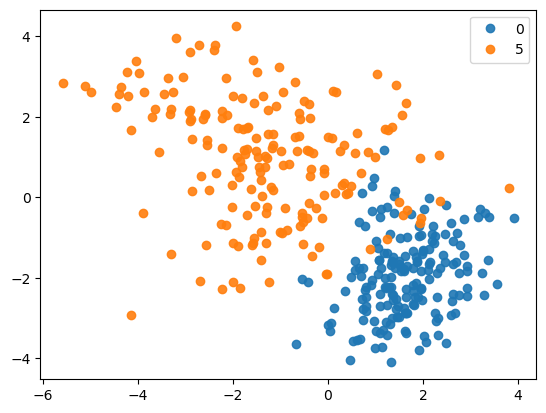

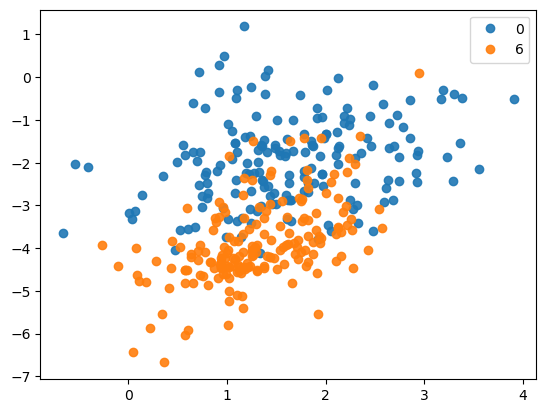

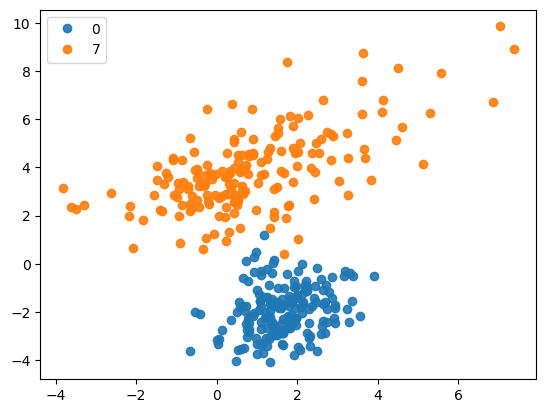

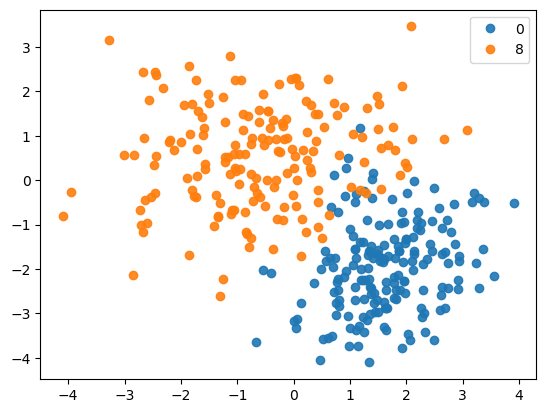

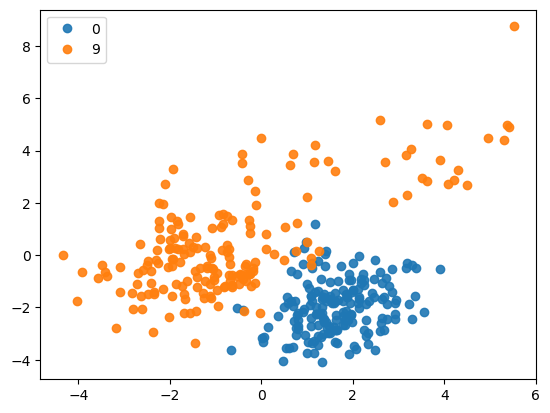

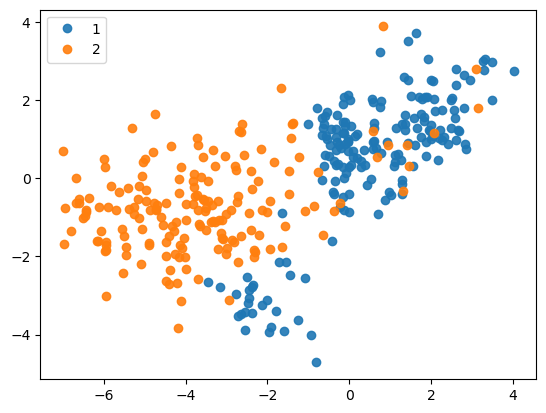

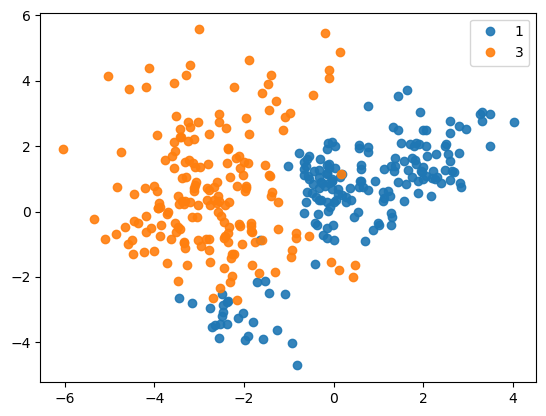

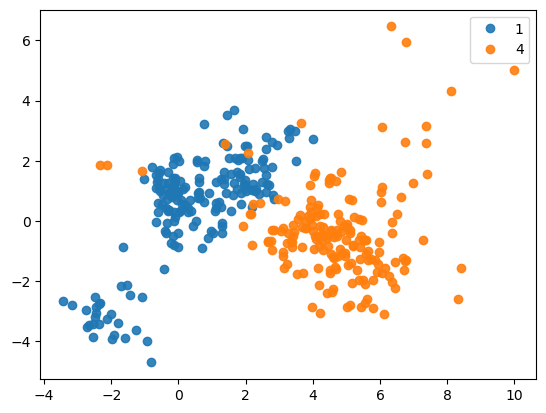

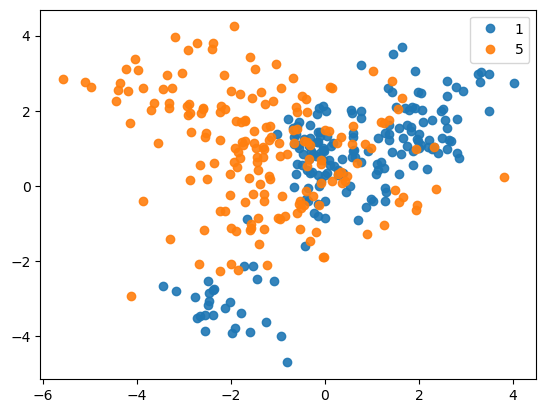

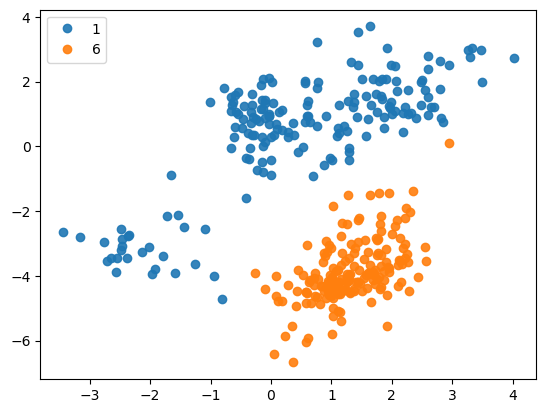

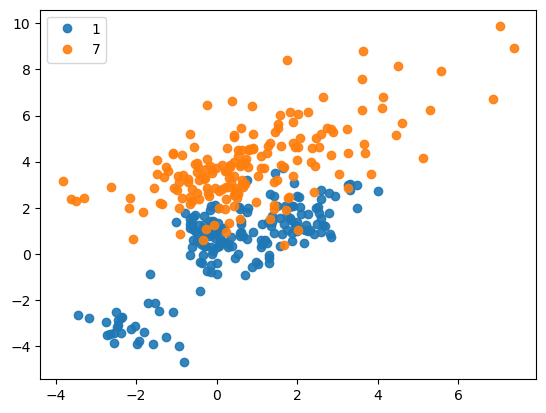

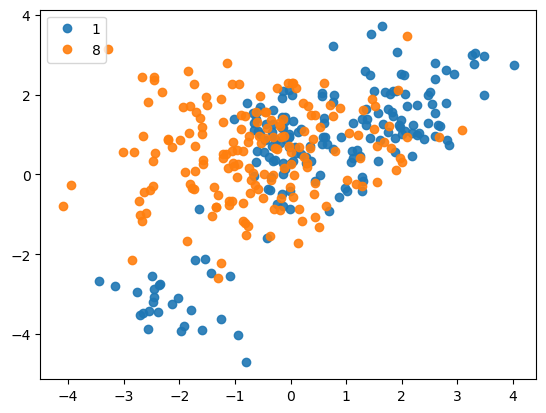

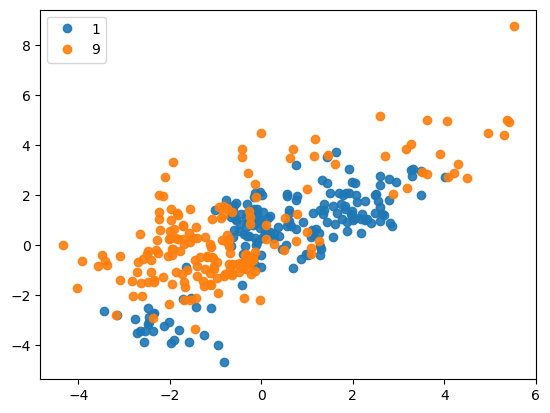

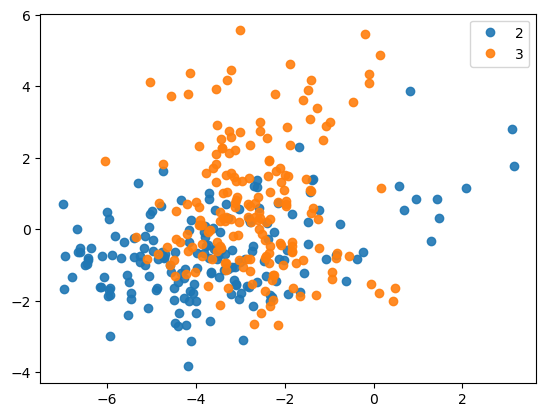

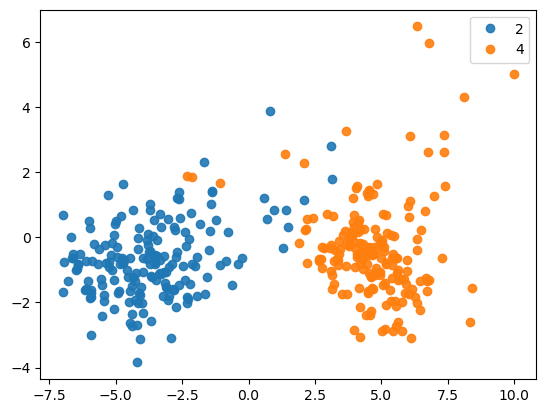

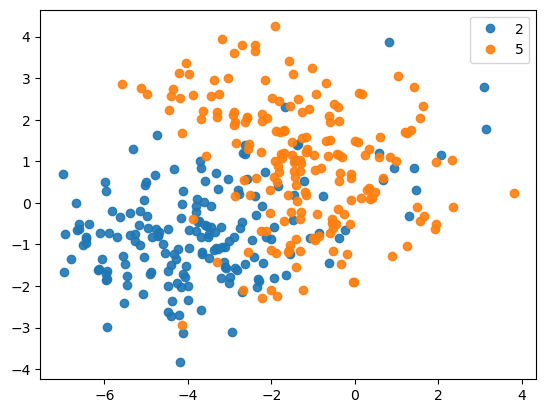

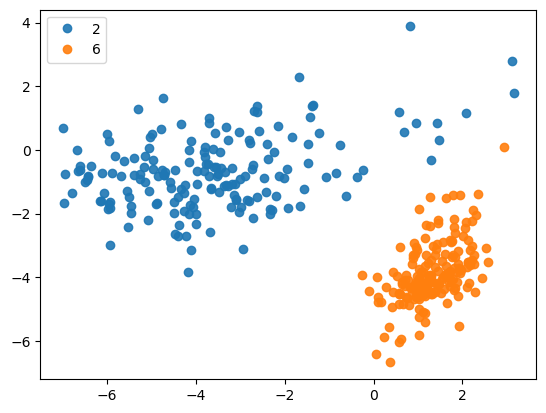

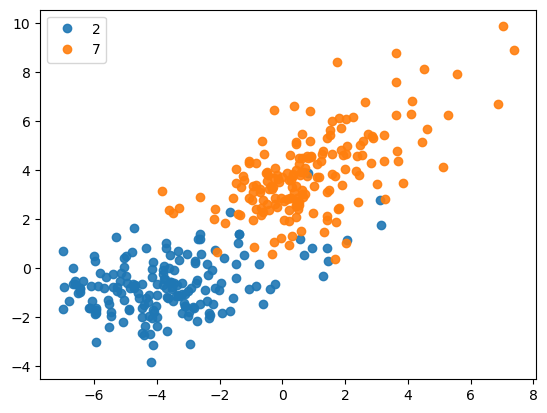

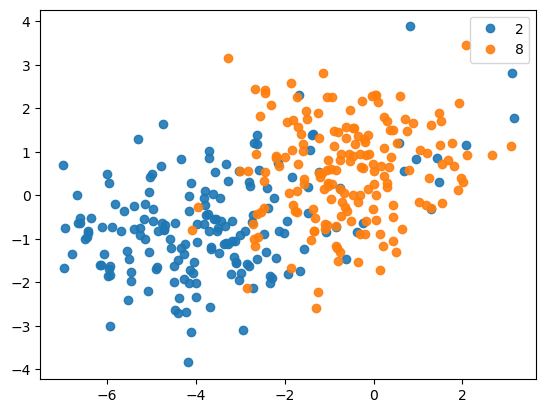

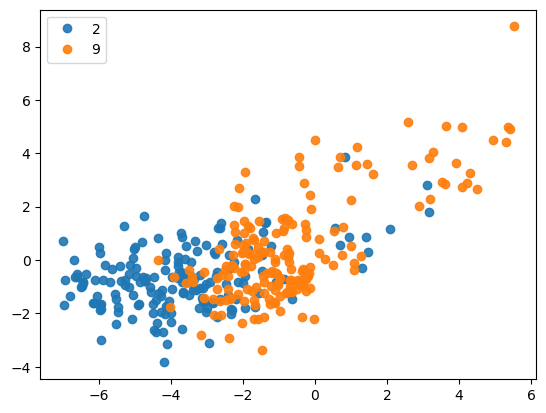

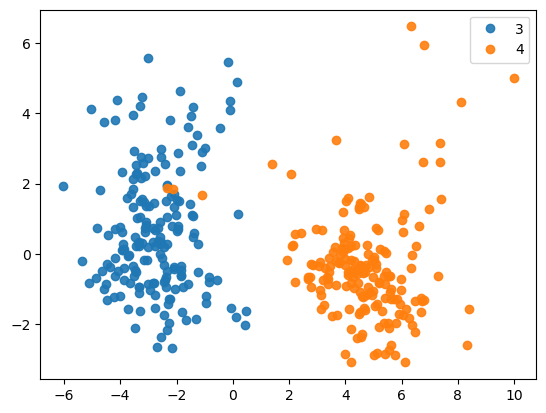

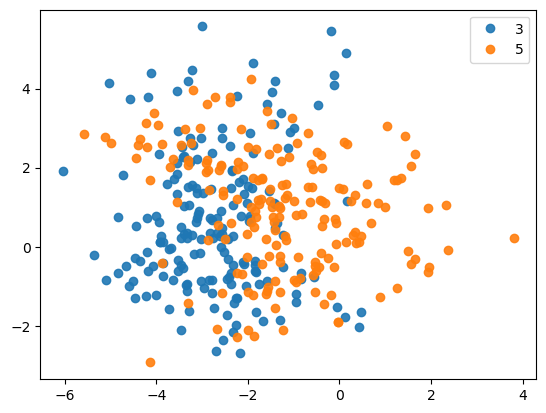

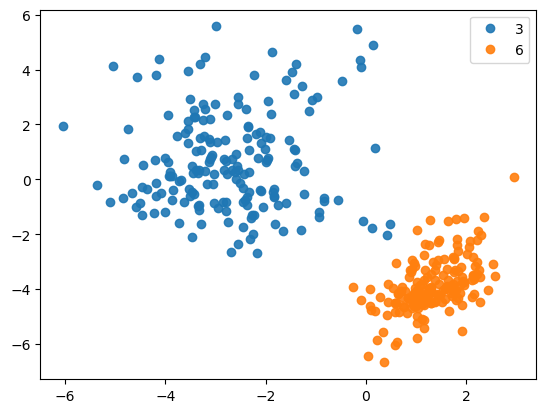

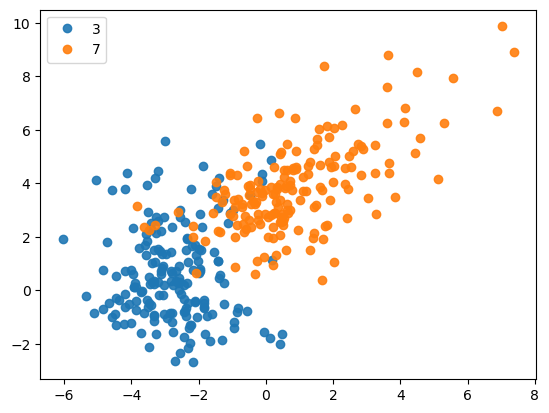

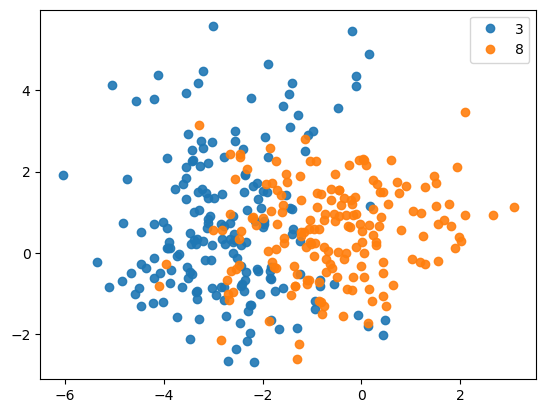

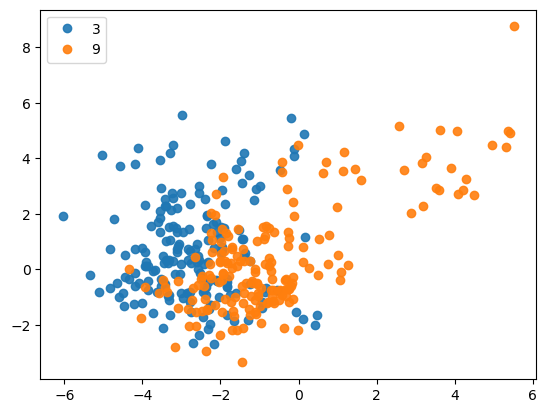

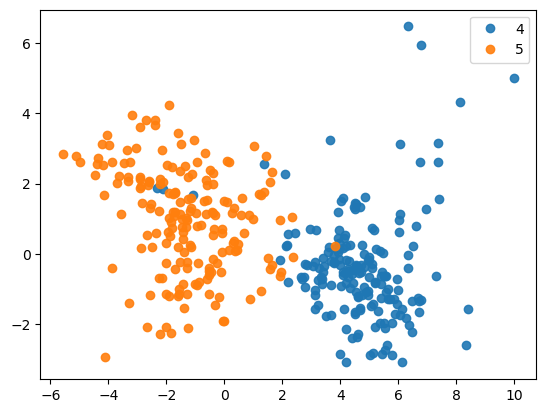

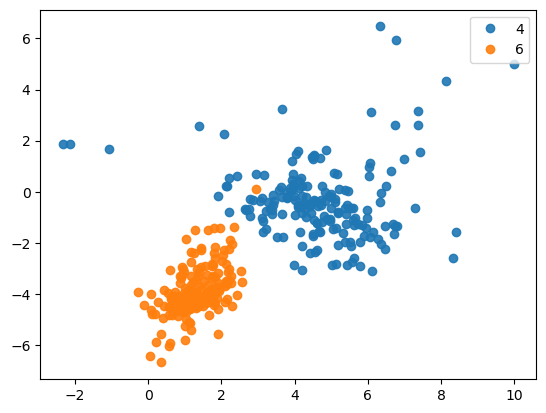

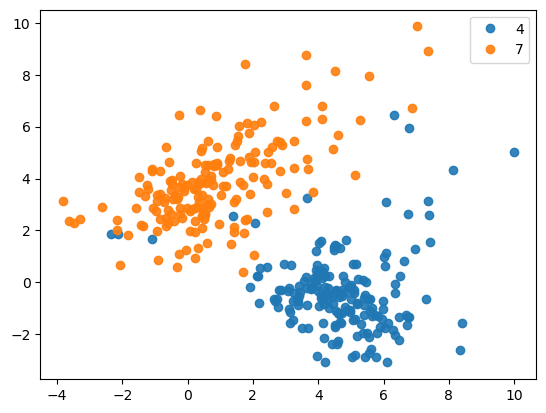

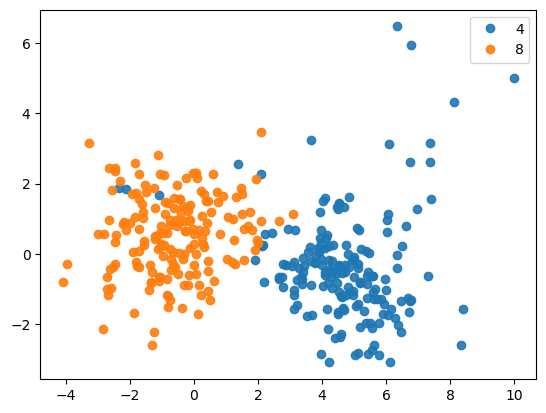

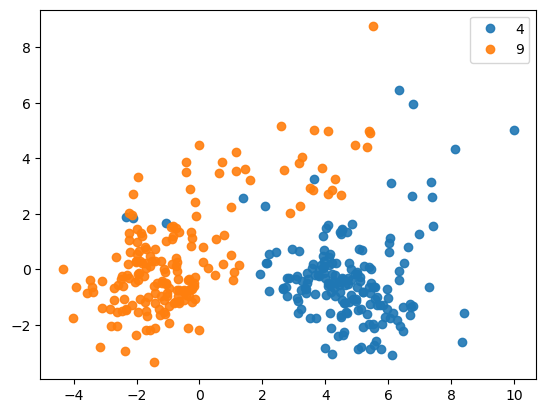

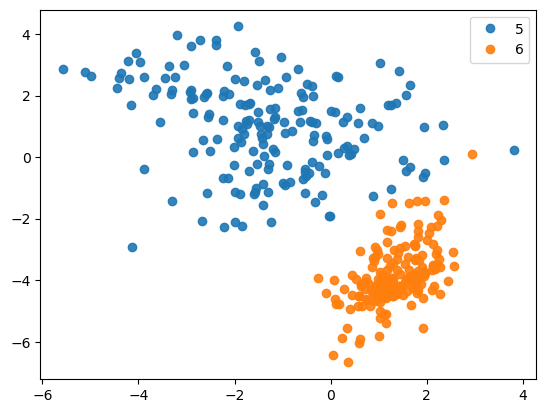

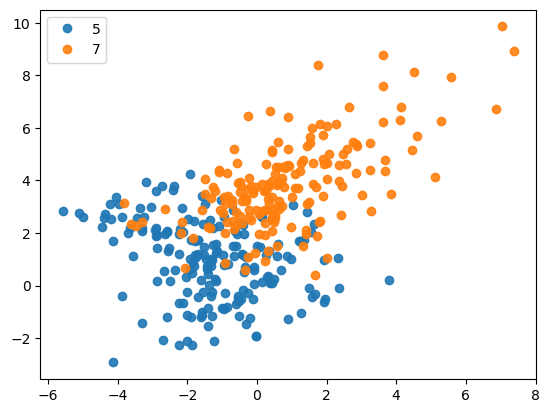

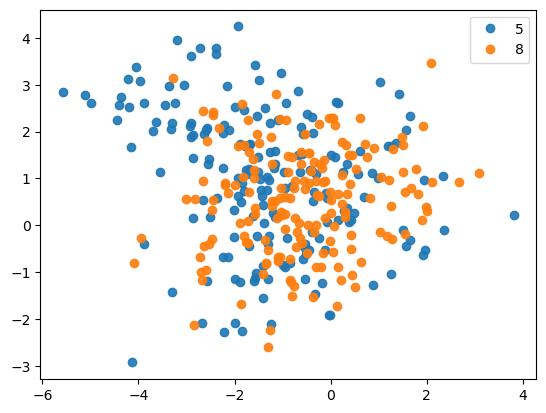

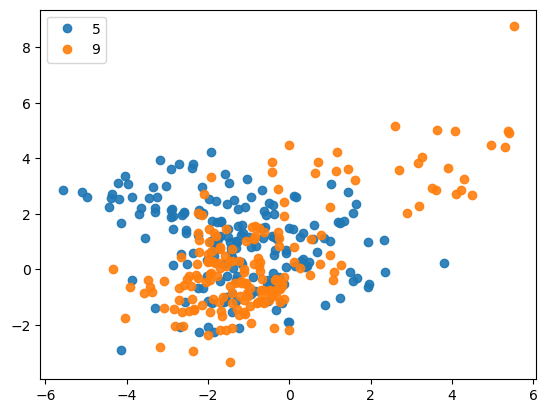

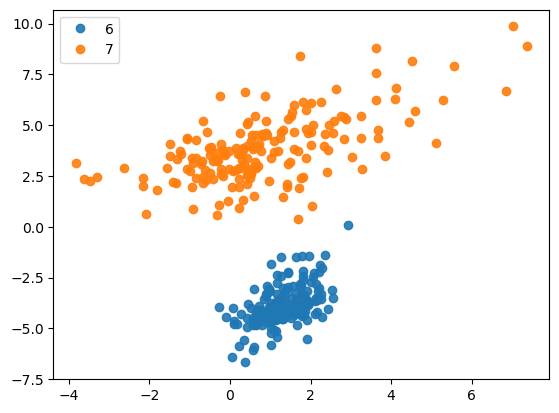

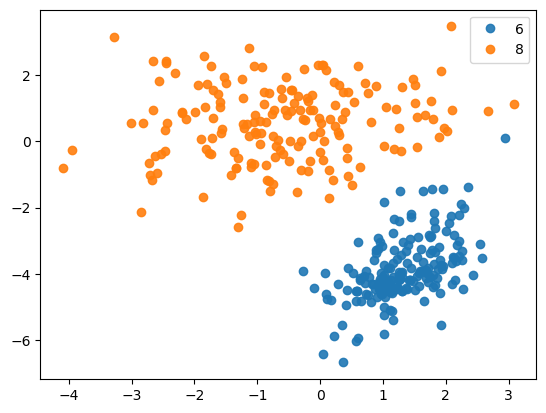

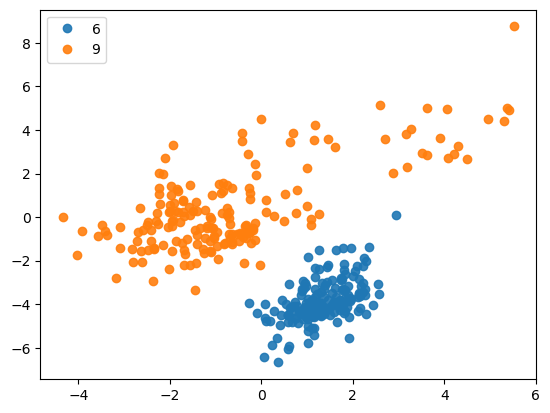

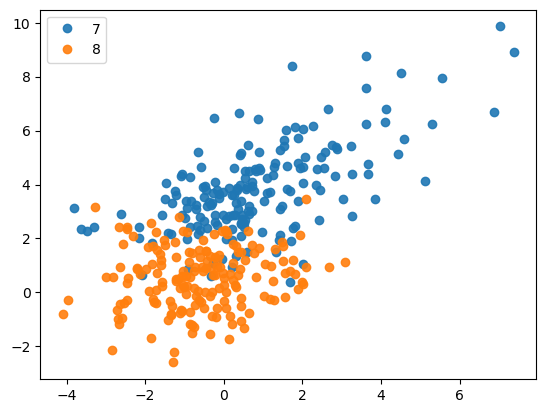

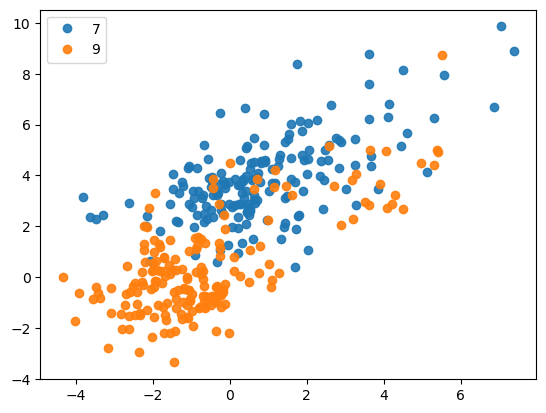

In [11]:
for i in range(0, 8):
    plt.figure()
    for j in range(i+1, 10):
        plt.plot(np.array(datayP[y==i, 0]), np.array(datayP[y==i, 1]), 'o',alpha=0.9, label=str(i))
        plt.plot(np.array(datayP[y==j, 0]), np.array(datayP[y==j, 1]), 'o',alpha=0.9, label=str(j))
        plt.legend(loc='best')
        plt.show()

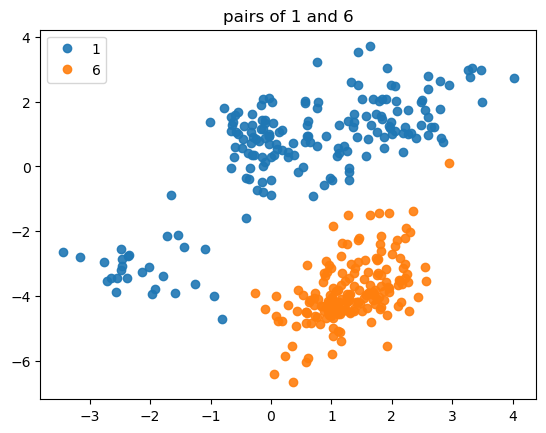

In [12]:
# a) can be clearly distinguished
plt.figure()
for i in [1,6]:
    plt.plot(np.array(datayP[y==i, 0]), np.array(datayP[y==i, 1]), 'o', alpha=0.9, label=str(i))
plt.legend(loc='best')
plt.title('pairs of 1 and 6')
plt.show()

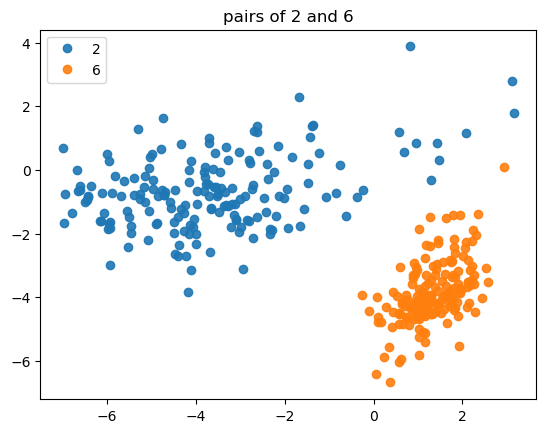

In [13]:
for i in [2,6]:
    plt.plot(np.array(datayP[y==i, 0]), np.array(datayP[y==i, 1]), 'o', alpha=0.9, label=str(i))
plt.legend(loc='best')
plt.title('pairs of 2 and 6')
plt.show()

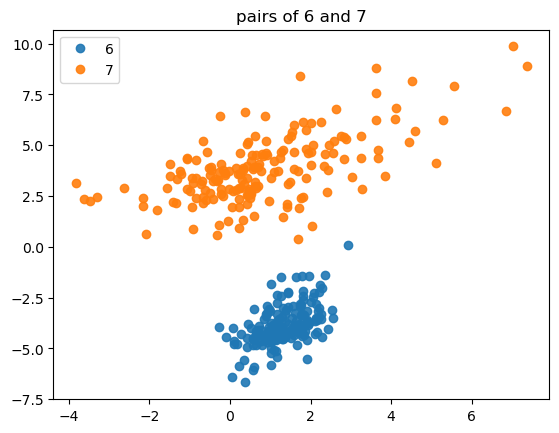

In [14]:
for i in [6,7]:
    plt.plot(np.array(datayP[y==i, 0]), np.array(datayP[y==i, 1]), 'o', alpha=0.9, label=str(i))
plt.legend(loc='best')
plt.title('pairs of 6 and 7')
plt.show()

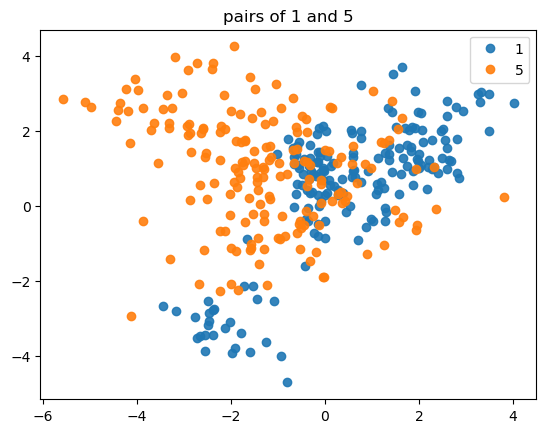

In [15]:
# b) can not be clearly distinguished
for i in [1,5]:
    plt.plot(np.array(datayP[y==i, 0]), np.array(datayP[y==i, 1]), 'o', alpha=0.9, label=str(i))
plt.legend(loc='best')
plt.title('pairs of 1 and 5')
plt.show()

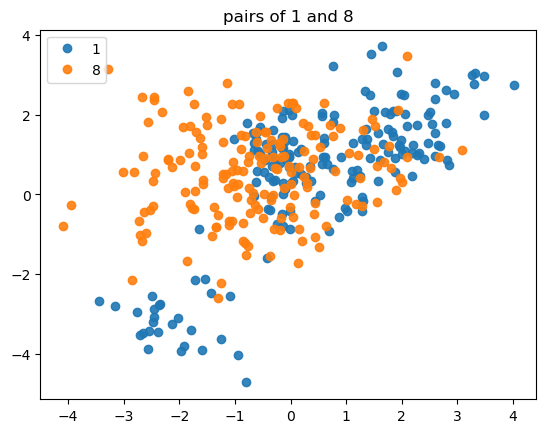

In [16]:
for i in [1,8]:
    plt.plot(np.array(datayP[y==i, 0]), np.array(datayP[y==i, 1]), 'o', alpha=0.9, label=str(i))
plt.legend(loc='best')
plt.title('pairs of 1 and 8')
plt.show()

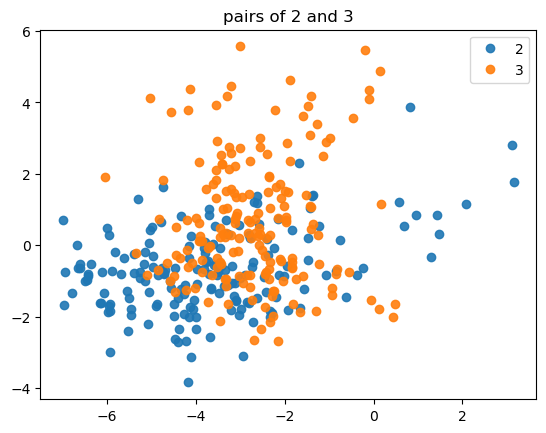

In [17]:
for i in [2,3]:
    plt.plot(np.array(datayP[y==i, 0]), np.array(datayP[y==i, 1]), 'o', alpha=0.9, label=str(i))
plt.legend(loc='best')
plt.title('pairs of 2 and 3')
plt.show()